# The Titanic Disaster

## Q2a
Importing libraries and data below

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, datasets, neighbors, linear_model

C:\Users\Huajun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# import data
train = pd.read_csv("train.csv", dtype={"Age": np.float64},)
test = pd.read_csv("test.csv", dtype={"Age": np.float64},)

In [3]:
#Print to standard output, and see the results in the "log" section below after running your script
print("\n\nTop of the training data:")
print(train.head())



Top of the training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

## Q2b
Choose 3 features: "Sex", "Age" and "PClass" according to __[this article](https://www.kaggle.com/meggles/titanic-model-training-and-validation)__ <br>
Then perform 5-fold cross-validation using logistic regression. Expected score (75%, 80%).

In [21]:
# Fill missing age values for the train and test data with corresponding mean value,
# and convert values from float to integer.
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

train["Age"] = train["Age"].fillna(train["Age"].mean())
train['Age'] = train['Age'].astype(int)

test["Age"] = test["Age"].fillna(test["Age"].mean())
test['Age'] = test['Age'].astype(int)

In [39]:
# choose features
# pclass--2, sex--4, age--5
data = pd.DataFrame.as_matrix(train)
myData = data[:, [0,1,2,4,5]]

In [31]:
logistic = linear_model.LogisticRegression()
for trainKF, testKF in (cross_validation.KFold(len(myData), n_folds=5)):
    print('LogisticRegression score: %f' 
          % logistic.fit(myData[trainKF, 2:5], list(myData[trainKF, 1])).score(myData[testKF, 2:5], list(myData[testKF, 1])))

LogisticRegression score: 0.798883
LogisticRegression score: 0.814607
LogisticRegression score: 0.775281
LogisticRegression score: 0.752809
LogisticRegression score: 0.808989


## Q2c
Computing test prediction and submitting below. Accuracy achieved at 75.6%

In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


In [35]:
results = logistic.predict(pd.DataFrame.as_matrix(test)[:,[1,3,4]])

In [37]:
#------------RESULT SUBMISSION---------#
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": results
    })

submission.to_csv('pred.csv', index=False)

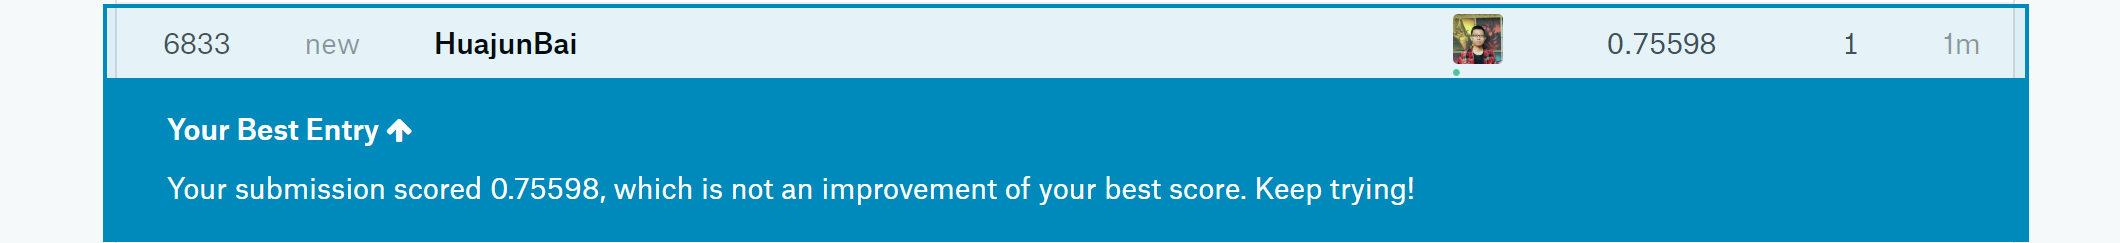

In [38]:
from IPython.display import Image
Image("titanic.png")